<a href="https://colab.research.google.com/github/tj-0212/Dataset-for-brain-tumor/blob/main/try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas-datareader

In [29]:
!pip install yfinance


In [30]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import math
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import *
from keras.layers import *
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yfin


In [42]:
#get stock quote using over load as there wa some issue in the return of json packet from the url index sting out of range
yfin.pdr_override()
#APPlE ('AAPl') target company 
data = pdr.get_data_yahoo('AAPl',start='2012-01-01',end='2019-12-18')
print(data)


[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.519278  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.586561  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.726294  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.859331  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.838933  394024400
...               ...        ...        ...        ...        ...        ...
2019-12-11  67.202499  67.775002  67.125000  67.692497  66.316818   78756800
2019-12-12  66.945000  68.139999  66.830002  67.864998  66.485817  137310400
2019-12-13  67.864998  68.824997  67.732498  68.787498  67.389549  133587600
2019-12-16  69.250000  70.197502  69.245003  69.964996  68.543137  128186000
2019-12

In [43]:
#Get the number of rows and columns in the datasdata
data.shape

(2003, 6)

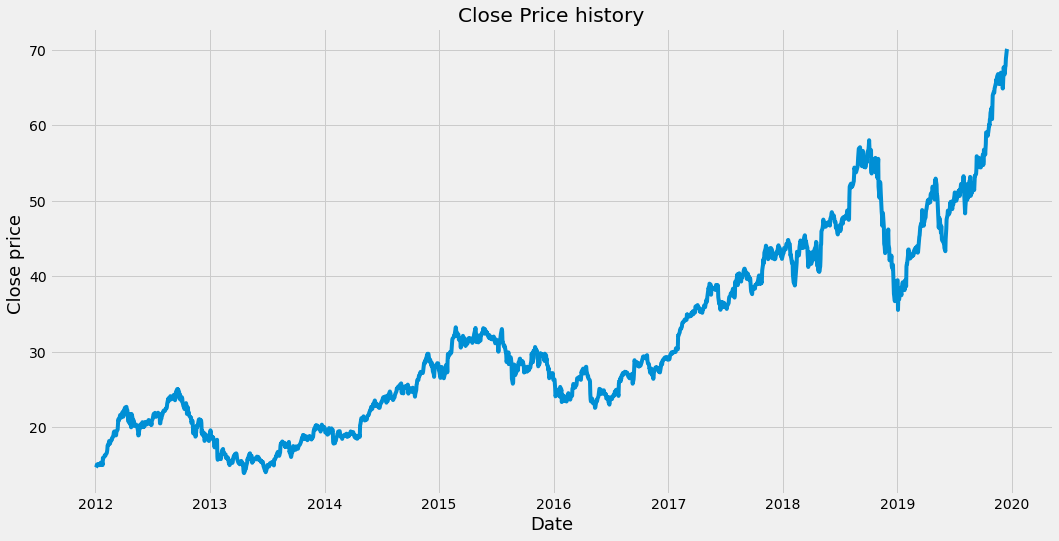

In [44]:
#main Target visualization
#the size of the graph
plt.figure(figsize=(16,8))
#the title
plt.title('Close Price history')
#poting on close data
plt.plot(data['Close'])
plt.xlabel('Date' ,fontsize=18)
plt.ylabel('Close price ',fontsize=18)
plt.show()

In [47]:
#create a new data with target (CLose) as it is used for prediction and our time varing component is date
Data = data.filter(['Close'])
#convert to numpy
dataset = Data.values
#get number of rows to train model
#for data train and test splitting
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

1603

In [48]:
#Scaling of data before it is served to model
#scaling takes place between 0 and 1 for model computation
scaler = MinMaxScaler(feature_range=(0,1))
#after setting minmax we apply that to our dataset
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [52]:
#create the training datset
#create scaled datset
train_data = scaled_data[0:training_data_len,:]
#split the dta into x_train and y_train sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()



[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [53]:
#COnvert the x_train and y_train to numpy to use them for training model
x_train,y_train = np.array(x_train),np.array(y_train)


In [56]:
#Reshape data for lstm data to 3 dimentional
print(x_train.shape)
print("Not in three dimentional")

(1543, 60)
Not in three dimentional


In [57]:
#reshape data
#x_train = np.reshape(x_train,(1543,60,1))

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [58]:
#build LSTM model
model  = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [60]:
#compile model
model.compile(optimizer = 'adam',loss='mean_squared_error')

In [61]:
#train model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1543/1543 [==============================] - 44s 26ms/step - loss: 7.5220e-04


In [63]:
#create the testing datset
#create a new array containg scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60:,:]
#create the datset sets x_test and y_test
x_test= []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])



In [64]:
#convet data agin to numpy
x_test = np.array(x_test)

In [65]:
#reshape data to 3d
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))
 


In [67]:
#Get the moded=l prediction price values
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)


13/13 [==============================] - 0s 16ms/step


In [69]:
#get the root mean squared error(RMSE)
rmse = np.sqrt( np.mean( prediction - y_test)**2)
rmse

0.20123207092285156

<ipython-input-71-4a1af285e6d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = prediction


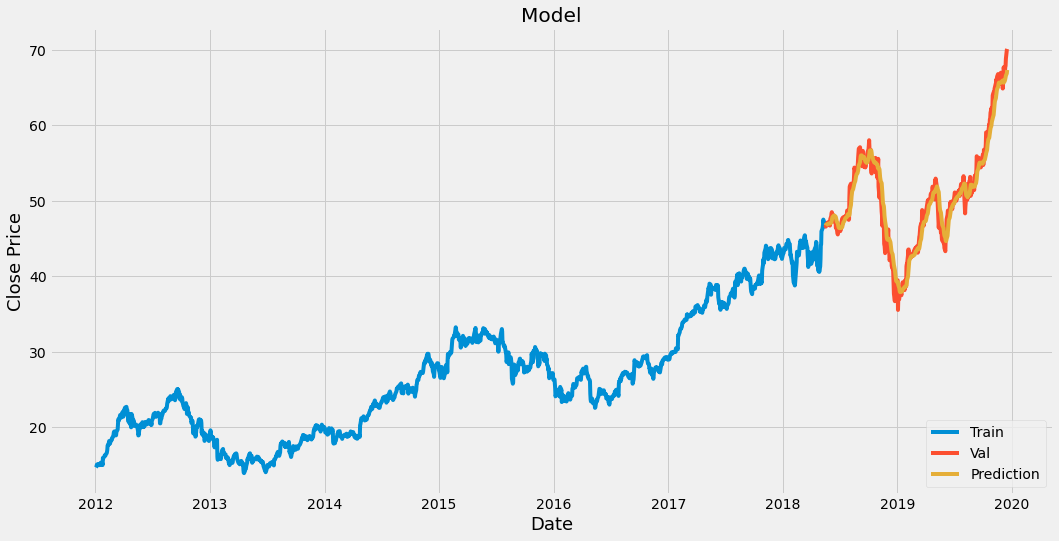

In [71]:
train = Data[:training_data_len]
valid = Data[training_data_len:]
valid['Prediction'] = prediction
#plot the graph
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Val','Prediction'],loc='lower right')
plt.show()

In [72]:
#Show actual and predicted values
valid

,Close,Prediction
Date,,
2018-05-17,46.747501,46.736477
2018-05-18,46.577499,46.824539
2018-05-21,46.907501,46.846390
2018-05-22,46.790001,46.870922
2018-05-23,47.090000,46.879574
...,...,...
2019-12-11,67.692497,66.118477
2019-12-12,67.864998,66.330032
2019-12-13,68.787498,66.558250


In [74]:
#get the quote
apple_quote = pdr.get_data_yahoo('AAPl',start='2012-01-01',end='2019-12-18')
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#get the last 60 day closeing price value and conver dataframe to an array
last_60_days = new_df[-60:].values
#scale data again betwenn 0's and1's 
last_60_days_scale = scaler.transform(last_60_days)
# create a storage 
X_test = []
#append the past 60 days
X_test.append(last_60_days_scale)
#convert the X_test into numpy array
X_test = np.array(X_test)
#reshape the X_test
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Gettting the already predicted values (scalar)
pred_price = model.predict(X_test)
#Rescae
rescales_price = scaler.inverse_transform(pred_price)
print(rescales_price)


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 44ms/step
[[67.78372]]


In [77]:
apple_quote_2 = pdr.get_data_yahoo('AAPl',start='2019-12-18',end='2019-12-19')
print(apple_quote_2['Close'])


[*********************100%***********************]  1 of 1 completed
Date
2019-12-18    69.934998
Name: Close, dtype: float64
